In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms,models
import numpy as np
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm
from sklearn import metrics

In [2]:
# import dataset
from sklearn import datasets
iris = datasets.load_iris()

print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [3]:
# train test split dataset
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, shuffle=True, random_state=42)

In [4]:
x_train_t= torch.from_numpy(x_train).to(torch.float32)
x_test_t= torch.from_numpy(x_test).to(torch.float32)
y_train_t= torch.from_numpy(y_train).to(torch.long)
y_test_t= torch.from_numpy(y_test).to(torch.long)

In [5]:
x_train_t.shape

torch.Size([120, 4])

In [6]:
from sklearn import metrics
import seaborn as sns
#sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})

def confusionMatrixAndAccuracyReport(Y_test, Y_pred_probs):
    Y_pred = Y_pred_probs.argmax(axis=1)
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = metrics.accuracy_score(Y_test, Y_pred)

    classwiseAccuracy = cm.diagonal()/cm.sum(axis=1)


    plt.figure(figsize=(10, 10))
    plt.title(f'Accuracy : {overallAccuracy*100:3.2f}% ', size=14)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues', fmt='g')

    plt.show()
    print(f'Accuracy: {overallAccuracy*100:3.3f}%')
    print(f'Classwise Accuracy Score: \n{classwiseAccuracy}')

In [7]:
def plot_training_graphs(loss_list):
    fig = plt.figure(figsize =(20,7))
    plot = fig.add_subplot(1, 2, 1)
    plot.set_title("Training vs Validation loss")
    plot.plot(loss_list[:,0], linestyle='--', label="Training Loss")
    plot.plot(loss_list[:,1], linestyle='-', label="Validation Loss" )
    plot.set_xlabel("Epoch")
    plot.set_ylabel("Loss")
    plot.legend()
    plot = fig.add_subplot(1, 2, 2)
    plot.set_title("Training vs Validation Accuracy")
    plot.plot(loss_list[:,2], linestyle='--', label="Training Accuracy")
    plot.plot(loss_list[:,3], linestyle='-', label="Validation Accuracy" )
    plot.set_xlabel("Epoch")
    plot.set_ylabel("Accuracy")
    plot.legend()
    plt.show()

In [8]:
import time
import math
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [42]:
# Train the model
def model_training(model,criterion,optimizer,num_epochs = 10, patience = 5):
    start = time.time()
    loss_list = []
    best_val_loss = float('inf')
    num_epochs_since_improvement = 0
    for epoch in range(num_epochs):
        train_loss = 0.0
        val_loss = 0.0
        train_acc = 0.0
        val_acc = 0.0
        
        # Forward pass
        outputs = model(x_train_t)
        loss = criterion(outputs, y_train_t)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += metrics.accuracy_score(y_train_t,outputs.argmax(axis=1))
        # Evaluate the model on the validation set
        with torch.no_grad():
            outputs = model(x_test_t)
            loss = criterion(outputs, y_test_t)
            val_loss += loss.item()
            val_acc += metrics.accuracy_score(y_test_t,outputs.argmax(axis=1))
        print(f'Epoch: {epoch+1} ({timeSince(start)}) \tTraining Loss: {train_loss:.3f}, \tTest Loss: {val_loss:.3f},  \tTraining acc: {train_acc:.2f}, \tTest acc: {val_acc:.2f}, \t num_epochs_since_improvement = {num_epochs_since_improvement} ')
        loss_list.append([train_loss,val_loss,train_acc,val_acc])

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            num_epochs_since_improvement = 0
        else:
            num_epochs_since_improvement += 1
            
        if num_epochs_since_improvement == patience:
            print(f'Early stopping at epoch {epoch}')
            break
    
    print(f'Training completed in {timeSince(start)} \tTraining Loss: {loss_list[-1][0]:.3f}, \tTest Loss: {loss_list[-1][1]:.3f},  \tTraining acc: {loss_list[-1][2]:.2f}, \tTest acc: {loss_list[-1][3]:.2f}, ')
    return np.array(loss_list),time.time()-start,loss_list[-1][2],loss_list[-1][3]


In [10]:

class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(4, 4),
        nn.ReLU(),
        nn.Linear(4, 5),
        nn.ReLU(),
        nn.Linear(5, 3),
        nn.LogSoftmax(dim=1)
        )
  
  def forward(self, x):
    x = self.layers(x)
    return x
     

Epoch: 1 (0m 0s) 	Training Loss: 1.191, 	Test Loss: 1.182,  	Training acc: 0.33, 	Test acc: 0.33, 	 num_epochs_since_improvement = 0 
Epoch: 2 (0m 0s) 	Training Loss: 1.167, 	Test Loss: 1.164,  	Training acc: 0.33, 	Test acc: 0.33, 	 num_epochs_since_improvement = 0 
Epoch: 3 (0m 0s) 	Training Loss: 1.150, 	Test Loss: 1.149,  	Training acc: 0.33, 	Test acc: 0.33, 	 num_epochs_since_improvement = 0 
Epoch: 4 (0m 0s) 	Training Loss: 1.137, 	Test Loss: 1.137,  	Training acc: 0.33, 	Test acc: 0.33, 	 num_epochs_since_improvement = 0 
Epoch: 5 (0m 0s) 	Training Loss: 1.126, 	Test Loss: 1.126,  	Training acc: 0.33, 	Test acc: 0.33, 	 num_epochs_since_improvement = 0 
Epoch: 6 (0m 0s) 	Training Loss: 1.116, 	Test Loss: 1.115,  	Training acc: 0.33, 	Test acc: 0.33, 	 num_epochs_since_improvement = 0 
Epoch: 7 (0m 0s) 	Training Loss: 1.107, 	Test Loss: 1.105,  	Training acc: 0.33, 	Test acc: 0.33, 	 num_epochs_since_improvement = 0 
Epoch: 8 (0m 0s) 	Training Loss: 1.099, 	Test Loss: 1.096,  	T

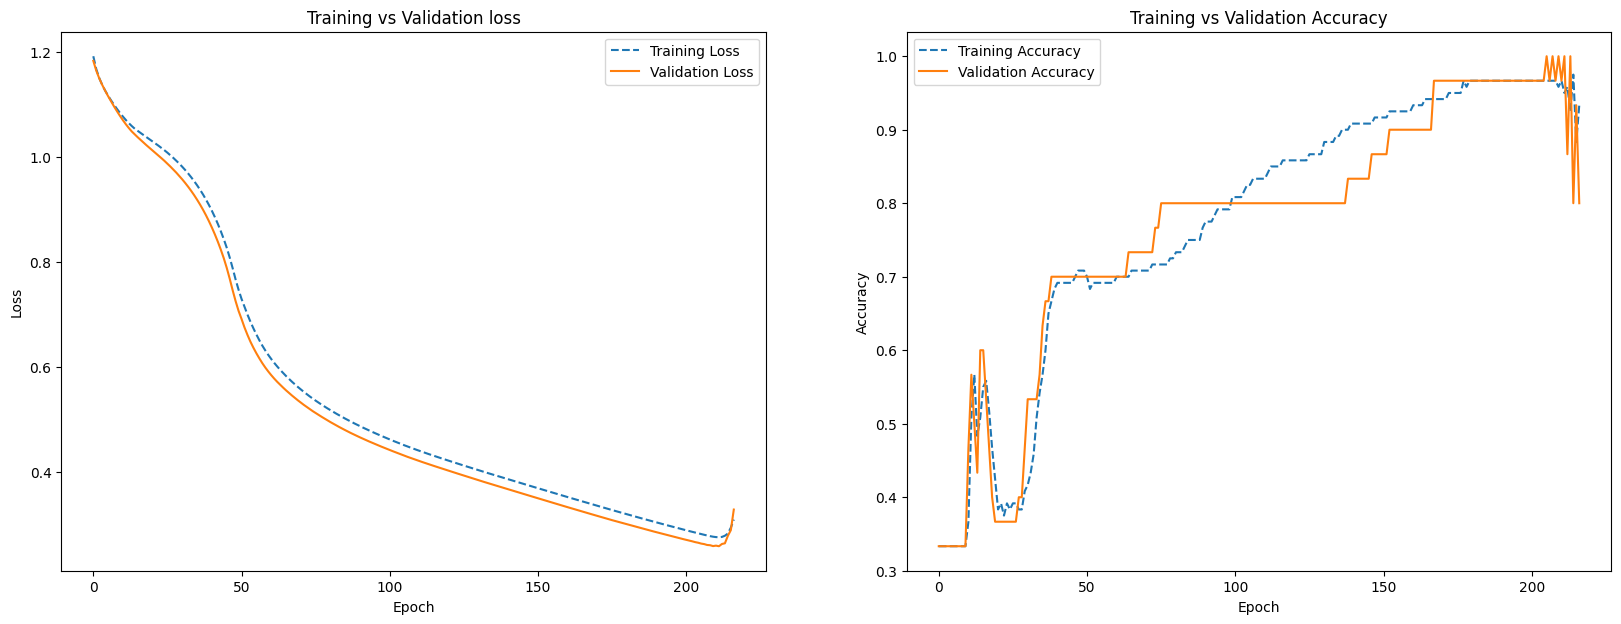

In [53]:


model = NeuralNet()
# Replace the final fully connected layer

optimizer_inst =  torch.optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()
loss_list,t,train_a,test_a = model_training(model,criterion,optimizer_inst,num_epochs=500,patience=5)
plot_training_graphs(loss_list)

Confusion Matrix 


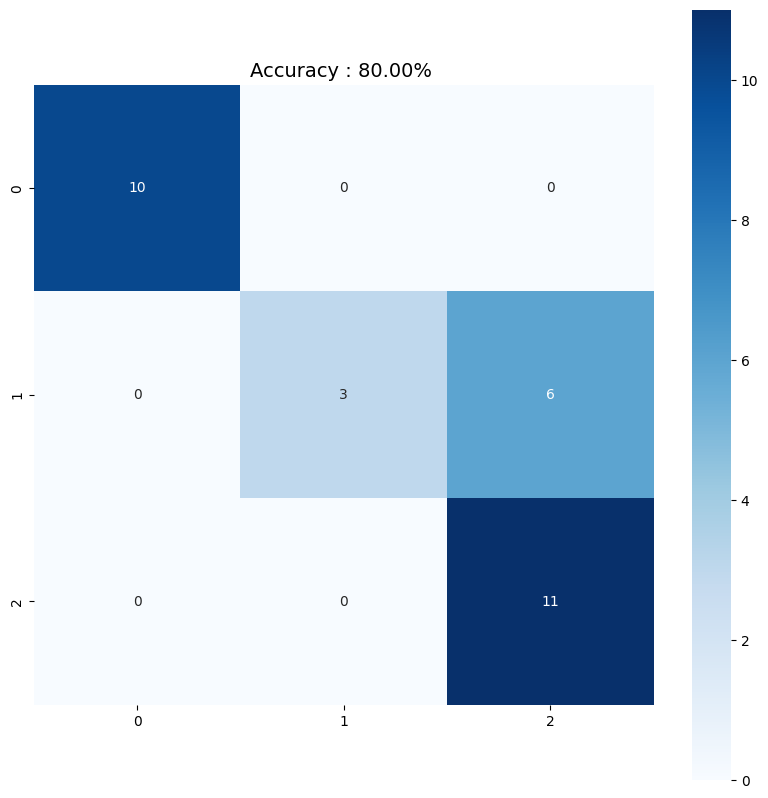

Accuracy: 80.000%
Classwise Accuracy Score: 
[1.         0.33333333 1.        ]


In [54]:

test_output = model(x_test_t)
with torch.no_grad():
    print(f'Confusion Matrix ')
    confusionMatrixAndAccuracyReport(y_test_t,test_output)